In [1]:
import pandas as pd
import numpy as np
import regex as rg
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [198]:
df_einstein_exames = pd.read_csv('Einstein_v3.csv', sep = '|', encoding = 'utf-8-sig')
df_fleury_exames = pd.read_csv('Fleury_v3.csv', sep = '|', encoding = 'utf-8-sig')
df_hsl_exames = pd.read_csv('HSL_v3.csv', sep = '|', encoding = 'utf-8-sig')

In [199]:
cols_numericas_einstein = df_einstein_exames.describe().columns.to_list()
cols_numericas_fleury = df_fleury_exames.describe().columns.to_list()
cols_numericas_hsl = df_hsl_exames.describe().columns.to_list()

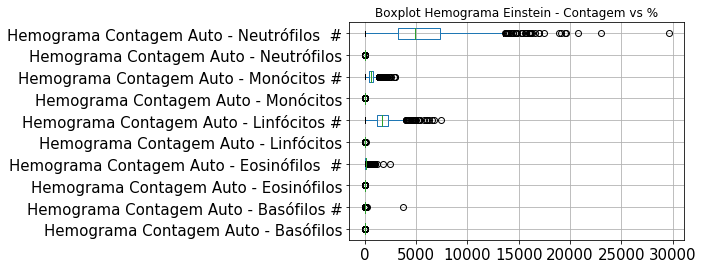

In [33]:
cols_hem_einstein = ['Hemograma Contagem Auto - Basófilos', 'Hemograma Contagem Auto - Basófilos #',
                       'Hemograma Contagem Auto - Eosinófilos', 'Hemograma Contagem Auto - Eosinófilos  #',
                       'Hemograma Contagem Auto - Linfócitos','Hemograma Contagem Auto - Linfócitos #',
                       'Hemograma Contagem Auto - Monócitos', 'Hemograma Contagem Auto - Monócitos #',
                       'Hemograma Contagem Auto - Neutrófilos','Hemograma Contagem Auto - Neutrófilos  #']
Box_Cont_x_Perc_Einstein = plt.figure();
bp = df_einstein_exames[cols_hem_einstein].boxplot(figsize=(10,3), rot=0, fontsize=15, vert=False)
plt.title('Boxplot Hemograma Einstein - Contagem vs %')
# save the figure
plt.savefig('Contagem vs % - Einstein.png', dpi=300, bbox_inches='tight')

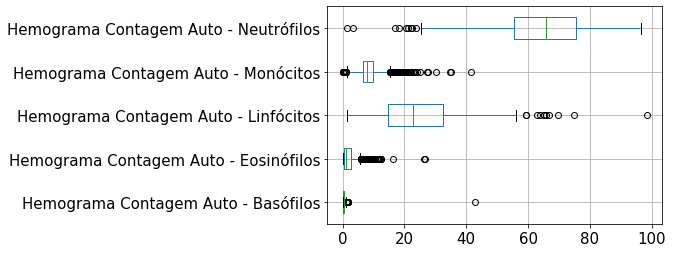

In [34]:
cols_hem_percentage = [col for col in cols_hem_einstein if not '#' in col]
Box_Perc_Einstein = plt.figure();
bp_pct = df_einstein_exames[cols_hem_percentage].boxplot(figsize=(10,3), rot=0, fontsize=15, vert=False)
#plt.title('Boxplot Hemograma Einstein - %')
# save the figure
plt.savefig('Hemograma % - Einstein.png', dpi=300, bbox_inches='tight')

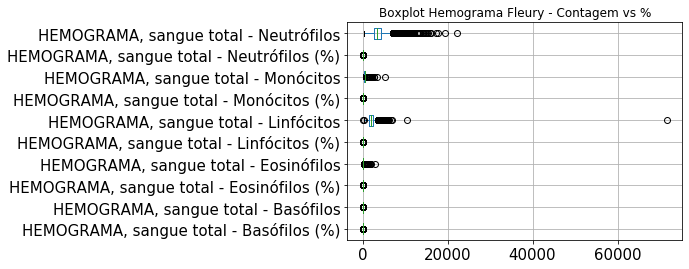

In [35]:
cols_hem_fleury = ['HEMOGRAMA, sangue total - Basófilos (%)', 'HEMOGRAMA, sangue total - Basófilos',
                   'HEMOGRAMA, sangue total - Eosinófilos (%)', 'HEMOGRAMA, sangue total - Eosinófilos',
                   'HEMOGRAMA, sangue total - Linfócitos (%)', 'HEMOGRAMA, sangue total - Linfócitos',
                   'HEMOGRAMA, sangue total - Monócitos (%)', 'HEMOGRAMA, sangue total - Monócitos',
                   'HEMOGRAMA, sangue total - Neutrófilos (%)', 'HEMOGRAMA, sangue total - Neutrófilos']
Box_Cont_x_Perc_Fleury = plt.figure();
bp = df_fleury_exames[cols_hem_fleury].boxplot(figsize=(10,3), rot=0, fontsize=15, vert=False)
plt.title('Boxplot Hemograma Fleury - Contagem vs %')
# save the figure
plt.savefig('Contagem vs % - Fleury.png', dpi=300, bbox_inches='tight')

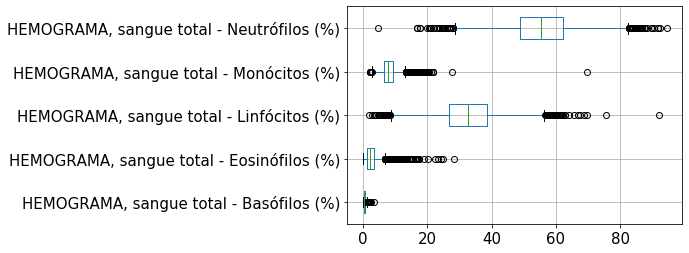

In [36]:
cols_hem_percentage = [col for col in cols_hem_fleury if '%' in col]
Box_Perc_Fleury = plt.figure();
bp_pct = df_fleury_exames[cols_hem_percentage].boxplot(figsize=(10,3), rot=0, fontsize=15, vert=False)
# save the figure
plt.savefig('Hemograma % - Fleury.png', dpi=300, bbox_inches='tight')

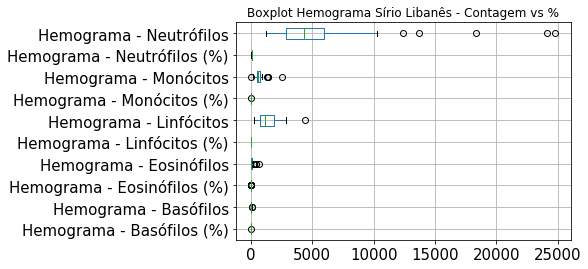

In [38]:
cols_hem_hsl = ['Hemograma - Basófilos (%)', 'Hemograma - Basófilos', 'Hemograma - Eosinófilos (%)',
                'Hemograma - Eosinófilos', 'Hemograma - Linfócitos (%)', 'Hemograma - Linfócitos',
                'Hemograma - Monócitos (%)', 'Hemograma - Monócitos', 'Hemograma - Neutrófilos (%)',
                'Hemograma - Neutrófilos']
Box_Cont_x_Perc_HSL = plt.figure();
bp = df_hsl_exames[cols_hem_hsl].boxplot(figsize=(10,3), rot=0, fontsize=15, vert=False)
plt.title('Boxplot Hemograma Sírio Libanês - Contagem vs %')
# save the figure
plt.savefig('Contagem vs % - Sírio Libanês.png', dpi=300, bbox_inches='tight')

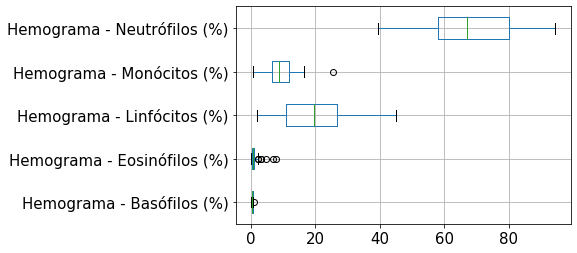

In [40]:
cols_hem_percentage = [col for col in cols_hem_hsl if '%' in col]
Box_Perc_HSL = plt.figure();
bp_pct = df_hsl_exames[cols_hem_percentage].boxplot(figsize=(10,3), rot=0, fontsize=15, vert=False)
# save the figure
plt.savefig('Hemograma % - Sírio Libanês.png', dpi=300, bbox_inches='tight')

In [200]:
#Retirando colunas contagem de hemograma
df_einstein_exames.drop([col for col in df_einstein_exames.columns if '#' in col], axis=1, inplace=True)
df_fleury_exames.drop(['HEMOGRAMA, sangue total - Basófilos', 'HEMOGRAMA, sangue total - Eosinófilos',
                       'HEMOGRAMA, sangue total - Linfócitos', 'HEMOGRAMA, sangue total - Monócitos',
                       'HEMOGRAMA, sangue total - Neutrófilos', 'HEMOGRAMA, sangue total - Leucócitos'], axis=1, inplace=True)
df_hsl_exames.drop(['Hemograma - Basófilos', 'Hemograma - Eosinófilos', 'Hemograma - Linfócitos',
                    'Hemograma - Monócitos', 'Hemograma - Neutrófilos', 'Hemograma - Leucócitos'], axis=1, inplace=True)

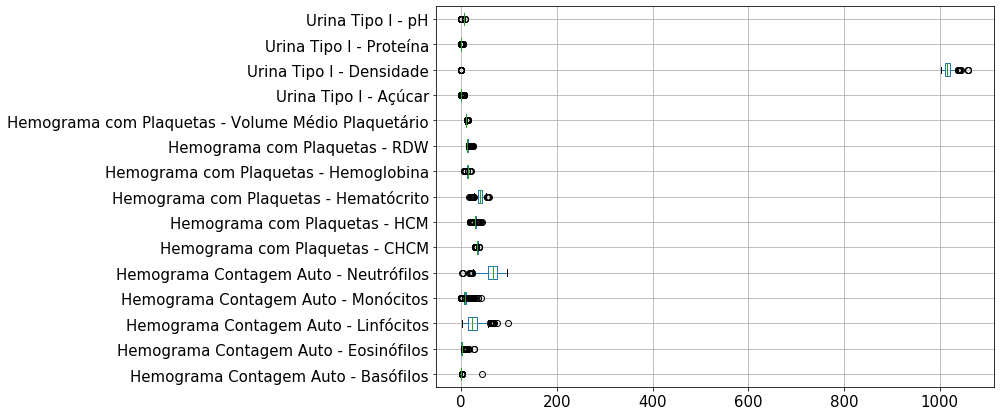

In [80]:
cols_numericas_einstein = df_einstein_exames.describe().columns.to_list()
cols_del_einstein = ['Urina Tipo I - Leucócitos Urina', 'Hemograma com Plaquetas - Plaquetas']
new_cols_einstein = [col for col in cols_numericas_einstein if col not in cols_del_einstein]
df_einstein_exames[new_cols_einstein].boxplot(figsize=(10,7), rot=0, fontsize=15, vert=False)

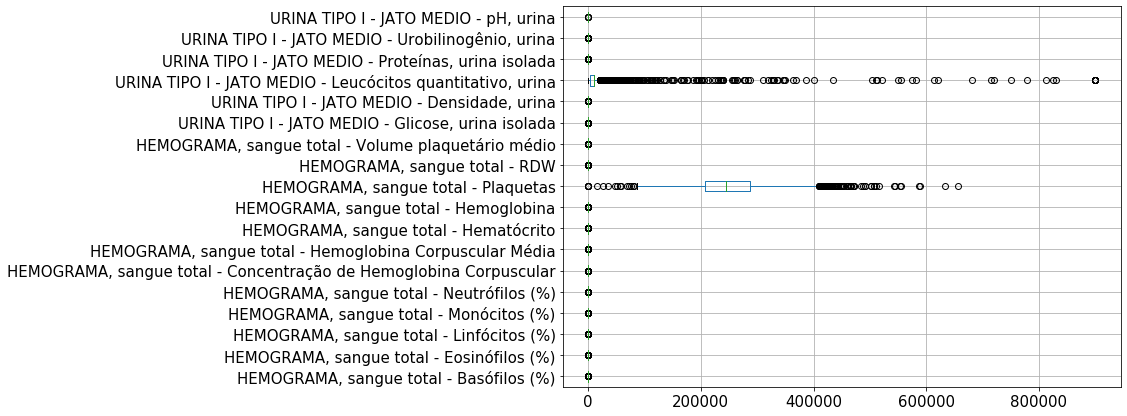

In [83]:
df_fleury_exames.boxplot(figsize=(10,7), rot=0, fontsize=15, vert=False)

Coluna Urina Tipo I - Leucócitos quantitativo e Hemograma - Plaquetas, mostram-se com muitos outliers em todos os dataframes.
Logo, as mesmas também serão excluídas.

In [201]:
#Retirando colunas de Leucócitos quantitativo na Urina e Plaquetas do Hemograma
df_einstein_exames.drop(['Urina Tipo I - Leucócitos Urina', 'Hemograma com Plaquetas - Plaquetas'], axis=1, inplace=True)
df_fleury_exames.drop(['HEMOGRAMA, sangue total - Plaquetas', 'URINA TIPO I - JATO MEDIO - Leucócitos quantitativo, urina'],
                      axis=1, inplace=True)
df_hsl_exames.drop(['Urina Tipo I - Jato Medio - Leucócitos, urina', 'Hemograma - Plaquetas'], axis=1, inplace=True)

C:\Users\jessi\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


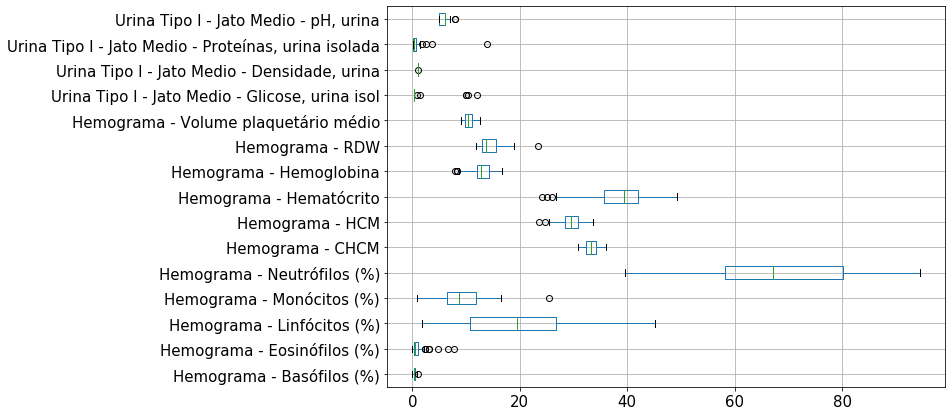

In [87]:
df_hsl_exames.boxplot(figsize=(10,7), rot=0, fontsize=15, vert=False)

In [202]:
cols_einstein_cat = ['Urina Tipo I - Aspecto', 'Urina Tipo I - Cor', 'Urina Tipo I - Corpos cetônicos', 
                     'Urina Tipo I - Nitrito', 'Urina Tipo I - Urobilinogênio', 'DIAGNOSTICO_COVID']
df_einstein_exames[cols_einstein_cat[4]].value_counts()

Negativo    1790
Positivo      40
Name: Urina Tipo I - Urobilinogênio, dtype: int64

In [203]:
cols_fleury_cat = ['URINA TIPO I - JATO MEDIO - Aspecto, urina', 'URINA TIPO I - JATO MEDIO - Cor, urina',
                   'URINA TIPO I - JATO MEDIO - Corpos cetônicos, urina', 'URINA TIPO I - JATO MEDIO - Nitrito, urina',
                   'URINA TIPO I - JATO MEDIO - Urobilinogênio, urina', 'DIAGNOSTICO_COVID']
df_fleury_exames[cols_fleury_cat[4]].value_counts()

1.0     4387
8.0        8
4.0        6
0.0        5
12.0       1
Name: URINA TIPO I - JATO MEDIO - Urobilinogênio, urina, dtype: int64

In [205]:
cols_hsl_cat = ['Urina Tipo I - Jato Medio - Aspecto, urina', 'Urina Tipo I - Jato Medio - Cor, urina', 
                'Urina Tipo I - Jato Medio - C.Cetônicos, urina', 'Urina Tipo I - Jato Medio - Nitrito, urina',
                'Urina Tipo I - Jato Medio - Urobilinogênio,urina', 'DIAGNOSTICO_COVID']
df_hsl_exames[cols_hsl_cat[4]].value_counts()

Negativo    40
Positivo     1
Name: Urina Tipo I - Jato Medio - Urobilinogênio,urina, dtype: int64

Transformação de colunas categóricas em númericas

In [206]:
dict_urina_aspecto = {'Límpido':1, 'Ligeiramente Turvo':2, 'Turvo':3, 'Coloração alterada':4, 'Sanguinolenta':5}
for key, value in dict_urina_aspecto.items():
    df_einstein_exames.loc[df_einstein_exames['Urina Tipo I - Aspecto'] == key, 'Urina Tipo I - Aspecto'] = value

In [207]:
dict_urina_aspecto_fleury = {'límpido':1, 'ligeiramente turvo':2, 'turvo':3}
for key, value in dict_urina_aspecto_fleury.items():
    df_fleury_exames.loc[df_fleury_exames['URINA TIPO I - JATO MEDIO - Aspecto, urina'] == key, 
                           'URINA TIPO I - JATO MEDIO - Aspecto, urina'] = value

In [208]:
dict_urina_aspecto_hsl = {'límpido':1, 'ligeiramente turvo':2, 'turvo':3}
for key, value in dict_urina_aspecto_hsl.items():
    df_hsl_exames.loc[df_hsl_exames['Urina Tipo I - Jato Medio - Aspecto, urina'] == key, 
                           'Urina Tipo I - Jato Medio - Aspecto, urina'] = value

In [209]:
dict_urina_cor_einstein = {'Amarela':1, 'Amarela clara':1, 'Amarelo Cítrino':1, 'Amarelada':1, 
                           'Amarela Ambar':2, 'Alaranjada':3, 'Avermelhada':4, 'Esverdeada':5,
                           'Marrom':6, 'MR':6}
for key, value in dict_urina_cor_einstein.items():
    df_einstein_exames.loc[df_einstein_exames['Urina Tipo I - Cor'] == key, 'Urina Tipo I - Cor'] = value

In [210]:
dict_urina_cor_fleury = {'amarela':1, 'amarela escura':2, 'alaranjada':3, 'verde':5, 'castanha':6}
for key, value in dict_urina_cor_fleury.items():
    df_fleury_exames.loc[df_fleury_exames['URINA TIPO I - JATO MEDIO - Cor, urina'] == key, 
                           'URINA TIPO I - JATO MEDIO - Cor, urina'] = value

In [211]:
dict_urina_cor_hsl = {'amarela':1, 'amarela escura':2, 'vermelha':4}
for key, value in dict_urina_cor_hsl.items():
    df_hsl_exames.loc[df_hsl_exames['Urina Tipo I - Jato Medio - Cor, urina'] == key, 
                           'Urina Tipo I - Jato Medio - Cor, urina'] = value

In [212]:
df_einstein_exames.loc[df_einstein_exames['Urina Tipo I - Corpos cetônicos'] == 'positiva', 
                       'Urina Tipo I - Corpos cetônicos'] = 1
df_einstein_exames.loc[df_einstein_exames['Urina Tipo I - Corpos cetônicos'] == 'negativa', 
                       'Urina Tipo I - Corpos cetônicos'] = 0
df_fleury_exames.loc[df_fleury_exames['URINA TIPO I - JATO MEDIO - Corpos cetônicos, urina'] == 'positiva', 
                       'URINA TIPO I - JATO MEDIO - Corpos cetônicos, urina'] = 1
df_fleury_exames.loc[df_fleury_exames['URINA TIPO I - JATO MEDIO - Corpos cetônicos, urina'] == 'negativa', 
                       'URINA TIPO I - JATO MEDIO - Corpos cetônicos, urina'] = 0
df_hsl_exames.loc[df_hsl_exames['Urina Tipo I - Jato Medio - C.Cetônicos, urina'] == 'positiva',
                 'Urina Tipo I - Jato Medio - C.Cetônicos, urina'] = 1
df_hsl_exames.loc[df_hsl_exames['Urina Tipo I - Jato Medio - C.Cetônicos, urina'] == 'negativa',
                 'Urina Tipo I - Jato Medio - C.Cetônicos, urina'] = 0

In [213]:
df_einstein_exames.loc[df_einstein_exames['Urina Tipo I - Nitrito'] == 'positiva', 
                       'Urina Tipo I - Nitrito'] = 1
df_einstein_exames.loc[df_einstein_exames['Urina Tipo I - Nitrito'] == 'negativa', 
                       'Urina Tipo I - Nitrito'] = 0
df_fleury_exames.loc[df_fleury_exames['URINA TIPO I - JATO MEDIO - Nitrito, urina'] == 'positiva', 
                       'URINA TIPO I - JATO MEDIO - Nitrito, urina'] = 1
df_fleury_exames.loc[df_fleury_exames['URINA TIPO I - JATO MEDIO - Nitrito, urina'] == 'negativa', 
                       'URINA TIPO I - JATO MEDIO - Nitrito, urina'] = 0
df_hsl_exames.loc[df_hsl_exames['Urina Tipo I - Jato Medio - Nitrito, urina'] == 'positiva',
                 'Urina Tipo I - Jato Medio - Nitrito, urina'] = 1
df_hsl_exames.loc[df_hsl_exames['Urina Tipo I - Jato Medio - Nitrito, urina'] == 'negativa',
                 'Urina Tipo I - Jato Medio - Nitrito, urina'] = 0

In [214]:
df_einstein_exames.loc[df_einstein_exames['Urina Tipo I - Urobilinogênio'] == 'Positivo', 
                       'Urina Tipo I - Urobilinogênio'] = 1
df_einstein_exames.loc[df_einstein_exames['Urina Tipo I - Urobilinogênio'] == 'Negativo', 
                       'Urina Tipo I - Urobilinogênio'] = 0
df_fleury_exames.loc[df_fleury_exames['URINA TIPO I - JATO MEDIO - Urobilinogênio, urina'] <= 1, 
                       'URINA TIPO I - JATO MEDIO - Urobilinogênio, urina'] = 0
df_fleury_exames.loc[df_fleury_exames['URINA TIPO I - JATO MEDIO - Urobilinogênio, urina'] > 0, 
                       'URINA TIPO I - JATO MEDIO - Urobilinogênio, urina'] = 1
df_hsl_exames.loc[df_hsl_exames['Urina Tipo I - Jato Medio - Urobilinogênio,urina'] == 'Positivo',
                 'Urina Tipo I - Jato Medio - Urobilinogênio,urina'] = 1
df_hsl_exames.loc[df_hsl_exames['Urina Tipo I - Jato Medio - Urobilinogênio,urina'] == 'Negativo',
                 'Urina Tipo I - Jato Medio - Urobilinogênio,urina'] = 0

In [216]:
df_einstein_exames.loc[df_einstein_exames['DIAGNOSTICO_COVID'] == 'Positivo', 'DIAGNOSTICO_COVID'] = 1
df_einstein_exames.loc[df_einstein_exames['DIAGNOSTICO_COVID'] == 'Negativo', 'DIAGNOSTICO_COVID'] = 0
df_fleury_exames.loc[df_fleury_exames['DIAGNOSTICO_COVID'] == 'Negativo', 'DIAGNOSTICO_COVID'] = 0
df_fleury_exames.loc[df_fleury_exames['DIAGNOSTICO_COVID'] == 'Positivo', 'DIAGNOSTICO_COVID'] = 1
df_hsl_exames.loc[df_hsl_exames['DIAGNOSTICO_COVID'] == 'Positivo', 'DIAGNOSTICO_COVID'] = 1
df_hsl_exames.loc[df_hsl_exames['DIAGNOSTICO_COVID'] == 'Negativo', 'DIAGNOSTICO_COVID'] = 0

In [225]:
df_einstein_exames['DT_COLETA'] = pd.to_datetime(df_einstein_exames['DT_COLETA'])
df_einstein_exames['Urina Tipo I - Aspecto'] = df_einstein_exames['Urina Tipo I - Aspecto'].astype(int)
df_einstein_exames['Urina Tipo I - Cor'] = df_einstein_exames['Urina Tipo I - Cor'].astype(int)
df_einstein_exames['Urina Tipo I - Corpos cetônicos'] = df_einstein_exames['Urina Tipo I - Corpos cetônicos'].astype(int)
df_einstein_exames['Urina Tipo I - Urobilinogênio'] = df_einstein_exames['Urina Tipo I - Urobilinogênio'].astype(int)
df_einstein_exames['Urina Tipo I - Nitrito'] = df_einstein_exames['Urina Tipo I - Nitrito'].astype(int)
df_einstein_exames['DIAGNOSTICO_COVID'] = df_einstein_exames['DIAGNOSTICO_COVID'].astype(int)

In [231]:
df_fleury_exames['DT_COLETA'] = pd.to_datetime(df_fleury_exames['DT_COLETA'])
df_fleury_exames['URINA TIPO I - JATO MEDIO - Aspecto, urina'] = df_fleury_exames['URINA TIPO I - JATO MEDIO - Aspecto, urina'].astype(int)
df_fleury_exames['URINA TIPO I - JATO MEDIO - Cor, urina'] = df_fleury_exames['URINA TIPO I - JATO MEDIO - Cor, urina'].astype(int)
df_fleury_exames['URINA TIPO I - JATO MEDIO - Corpos cetônicos, urina'] = df_fleury_exames['URINA TIPO I - JATO MEDIO - Corpos cetônicos, urina'].astype(int)
df_fleury_exames['URINA TIPO I - JATO MEDIO - Nitrito, urina'] = df_fleury_exames['URINA TIPO I - JATO MEDIO - Nitrito, urina'].astype(int)
df_fleury_exames['DIAGNOSTICO_COVID'] = df_fleury_exames['DIAGNOSTICO_COVID'].astype(int)
df_fleury_exames['URINA TIPO I - JATO MEDIO - Urobilinogênio, urina'] = df_fleury_exames['URINA TIPO I - JATO MEDIO - Urobilinogênio, urina'].astype(int)

In [234]:
df_hsl_exames['DT_COLETA'] = pd.to_datetime(df_hsl_exames['DT_COLETA'])
df_hsl_exames['Urina Tipo I - Jato Medio - Aspecto, urina'] = df_hsl_exames['Urina Tipo I - Jato Medio - Aspecto, urina'].astype(int)
df_hsl_exames['Urina Tipo I - Jato Medio - Cor, urina'] = df_hsl_exames['Urina Tipo I - Jato Medio - Cor, urina'].astype(int)
df_hsl_exames['Urina Tipo I - Jato Medio - C.Cetônicos, urina'] = df_hsl_exames['Urina Tipo I - Jato Medio - C.Cetônicos, urina'].astype(int)
df_hsl_exames['Urina Tipo I - Jato Medio - Nitrito, urina'] = df_hsl_exames['Urina Tipo I - Jato Medio - Nitrito, urina'].astype(int)
df_hsl_exames['Urina Tipo I - Jato Medio - Urobilinogênio,urina'] = df_hsl_exames['Urina Tipo I - Jato Medio - Urobilinogênio,urina'].astype(int)
df_hsl_exames['DIAGNOSTICO_COVID'] = df_hsl_exames['DIAGNOSTICO_COVID'].astype(int)

df_einstein_exames.set_index(['ID_PACIENTE', 'DT_COLETA'])
cols_num_einstein = df_einstein_exames.select_dtypes('number').columns.to_list()
z_scores_einstein = stats.zscore(df_einstein_exames[cols_num_einstein])
abs_z_scores_einstein = np.abs(z_scores_einstein)
filtered_entries_einstein = (abs_z_scores_einstein < 3).all(axis=1)
new_df_einstein_exames = df_einstein_exames[filtered_entries_einstein]
new_df_einstein_exames.iloc[:,:13].boxplot(figsize=(10,7), rot=0, fontsize=15, vert=False)

In [303]:
#Salvar versão com Label Enconding
df_einstein_exames.to_csv('Einstein_v4.csv', index=False, sep = '|', encoding = 'utf-8-sig')
df_fleury_exames.to_csv('Fleury_v4.csv', index=False, sep = '|', encoding = 'utf-8-sig')
df_hsl_exames.to_csv('HSL_v4.csv', index=False, sep = '|', encoding = 'utf-8-sig')